# K-means

## Data

Use the [World Value Survey](http://www.worldvaluessurvey.org/WVSDocumentationWV6.jsp) datafiles and corresponding questionaire and codebook files to understand what is in the data.

## Overarching research question

What kind of responder groups can emerge from survey responders and do they correspond to nationalities?
* Choose some relevant measurements
* Run analysis
* Interprent

## Method

There are many tools used for this, we apply [SciKit learn](https://scikit-learn.org/0.16/modules/clustering.html#clustering).



In [2]:
import csv
import sklearn.cluster
import sklearn
import collections

In this exercise, the question I am interested in answering is what kind of clusters can be found based on from where the people get information on "What is going on in this country and the world". In other words, are there any differences in the world in how often people use different media. The variables I chose were:

* Daily newspaper (V217)
* Printed magazines (V218)
* TV news (V219)
* Radio news (V220)
* Internet (V223)
* Talking with friends or collegues (V224)

The variables that I dropped from this group were Mobile phone (V211) and email (V222). The was because I am not sure what iit means that you get your information through mobile phone and email seems to be quite synonymous with the internet. The scale that these variables had was based on the question of "please indicate whether you use it [the source] to obtain information [1:] daily, [2:] weekly, [3:] monthly, [4:] less than monthly and [5:] never". 

In [4]:
## create new data matrix for k-means analysis

selected_keys = ['V217', 'V218', 'V219', 'V220', 'V223', 'V224']

number_of_lines = 0

data = []
country = []

for line in csv.DictReader( open('data/wvs.csv', encoding='utf8') ):
    number_of_lines += 1
    dd = []
    add_line_to_data = True
    
    for key in selected_keys:
        if int(line[key]) <= 0:
            add_line_to_data = False
        dd.append( line[key] )
        
    if add_line_to_data == True:
        country.append(line['COW'])
        data.append(dd)

print(number_of_lines)
print( len( data ) )
print( len( country) )

print(data[0:10])

89565
83976
83976
[['3', '4', '2', '2', '2', '4'], ['2', '3', '4', '3', '3', '3'], ['3', '4', '2', '2', '1', '1'], ['2', '3', '1', '2', '3', '3'], ['3', '4', '2', '2', '2', '3'], ['3', '4', '2', '2', '4', '3'], ['3', '4', '2', '2', '2', '3'], ['1', '3', '1', '2', '4', '4'], ['2', '3', '4', '2', '4', '3'], ['1', '2', '3', '4', '3', '3']]


In [3]:
clustering_machine = sklearn.cluster.KMeans( 10 )
clustering_results = clustering_machine.fit_predict( data )

## number of responders per cluster
print( collections.Counter( clustering_results ) )

Counter({3: 16294, 7: 11588, 6: 10059, 0: 9221, 4: 8134, 5: 6950, 1: 5890, 8: 5801, 2: 5401, 9: 4638})


Now we have created a **ten cluster** approach.
How do we know if it is any good?


At least it seems that the number of cases in each cluster is a bit unbalanced which probably is not something that we want to have (largest cluster has 16294 cases in them and smallest 4638). 

What would be different if we create a **five cluster** model instead?

In [5]:
clustering_machine = sklearn.cluster.KMeans( 5 )
clustering_results = clustering_machine.fit_predict( data )

## number of responders per cluster
print( collections.Counter( clustering_results ) )

Counter({1: 22682, 3: 18127, 2: 16068, 4: 14729, 0: 12370})


With five clusters the balance of the clusters are a bit better and perhaps would be much easier to interpret. 

Let's examine the mean values per each of the identified cluster.

In [4]:
## clustering_results with row ID numbers
all_clusters = set( clustering_results  )
clustering_results_with_rows = set( enumerate( clustering_results ) )

print('\t newspaper | magazines | TV news | Radio news | Internet | friends, collegues |')

for cluster in all_clusters:
    
    ## select entries in this cluster
    this_cluster_rows = filter( lambda cr: cr[1] == cluster, clustering_results_with_rows )
    this_cluster_values = []
    
    for entry in this_cluster_rows:
        row = entry[0]
        this_cluster_values.append( data[ row ] )
        
    print( "Cluster", cluster, end = ': ')
    
    ## compute means per cluster
    for i, name in enumerate( selected_keys ):
        
        dd = set( map( lambda x: int(x[i]), this_cluster_values ) )   
        print( name , sum( dd ) / len( dd ), end = ' | ' )
    print()
        
## TODO: this is super-manual way of doing this. Pandas could do all of this for you automatically.


	 newspaper | magazines | TV news | Radio news | Internet | friends, collegues |
Cluster 0: V217 3.0 | V218 3.0 | V219 3.0 | V220 2.0 | V223 2.0 | V224 3.0 | 
Cluster 1: V217 4.0 | V218 3.0 | V219 2.5 | V220 4.0 | V223 4.0 | V224 2.0 | 
Cluster 2: V217 3.0 | V218 3.0 | V219 3.0 | V220 2.5 | V223 3.5 | V224 4.0 | 
Cluster 3: V217 2.5 | V218 2.5 | V219 3.0 | V220 2.5 | V223 2.0 | V224 3.0 | 
Cluster 4: V217 4.0 | V218 3.0 | V219 2.0 | V220 2.0 | V223 4.0 | V224 2.0 | 
Cluster 5: V217 2.5 | V218 3.0 | V219 3.0 | V220 4.0 | V223 4.0 | V224 3.0 | 
Cluster 6: V217 3.0 | V218 3.0 | V219 3.0 | V220 4.0 | V223 2.5 | V224 3.0 | 
Cluster 7: V217 2.5 | V218 3.0 | V219 3.0 | V220 2.0 | V223 4.0 | V224 2.5 | 
Cluster 8: V217 3.0 | V218 3.0 | V219 3.0 | V220 3.5 | V223 3.0 | V224 4.0 | 
Cluster 9: V217 3.0 | V218 3.0 | V219 4.0 | V220 3.0 | V223 3.0 | V224 3.0 | 


## Task

* Run the above code and explain to yourself what is done.
* Response values -1, -2 and -3 relate to missing data (people answering I don't know etc.). Clean these values away from the dataset and redo your analysis.
* Choose suitable variables using the codebook and your understanding and intuition.
* Modify the number of clusters and examine how results change.

## Looking inside K-means

Often we prefer to use some data-driven approaches to identify the best number of clusters. One way to achieve this is to use the [elbow_ method](https://en.wikipedia.org/wiki/Elbow_method_(clustering)), where we visually inspect the best number of topics. Other tools exists as well, such as the [Silhouette method](https://en.wikipedia.org/wiki/Silhouette_(clustering)). Elbow is simple, but not always that clear and other methods are preferred. However, it is easy to understand.

The Elbow-method measures the distance clusters' items have to the centroid (sum of squared errors, sse). It can range from 0 (all items in the clusters are at the same point as its centroid) to positive infinity (nodes are all over the place). When numer or clusters (k) is increased, it decreases SSE; but this is a balancing act: how do you balance between more clusters and additional complexity and most explainability?

In [ ]:
sse = {}

for k in range(1, 10):
    kmeans = sklearn.cluster.KMeans(n_clusters=k).fit(data)
    sse[k] = kmeans.inertia_

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

## Tasks

* Draw three different k-means clusterings with centroids and related values and organize them by their SSE.

In [8]:
import matplotlib.pyplot as plt

sse = {}

clusterings = {}
n_of_clusters = [5, 7, 10]

for n in n_of_clusters:
    kmeans = sklearn.cluster.KMeans(n_clusters=n).fit(data)
    sse = kmeans.inertia_
    print('Clusters', n, ': ', sse)

Clusters 5 :  518798.13593903003
Clusters 7 :  436435.0393688539
Clusters 10 :  342700.2630843353


* Use the elbow method to optimize your model.

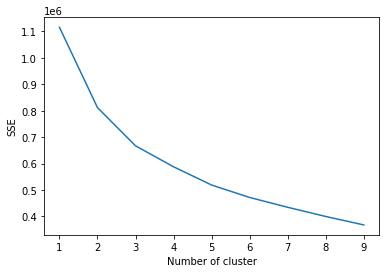

{1: 1115542.4939506527, 2: 811741.957204325, 3: 667096.5134278573, 4: 587774.6481817157, 5: 518821.9675530996, 6: 471760.4944610898, 7: 434649.9820351618, 8: 399826.898723904, 9: 367939.9928015232}


In [39]:
sse = {}

for k in range(1, 10):
    kmeans = sklearn.cluster.KMeans(n_clusters=k).fit(data)
    sse[k] = kmeans.inertia_
    
import matplotlib.pyplot as plt
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

print(sse)

I would say that best number for clusters would be four or five. With five clusters we get the following clusters: 

In [41]:
clustering_machine = sklearn.cluster.KMeans( 5 )
clustering_results = clustering_machine.fit_predict( data )

all_clusters = set( clustering_results  )
clustering_results_with_rows = set( enumerate( clustering_results ) )

print('\t newspaper | magazines | TV news | Radio news | Internet | friends, collegues |')

print( collections.Counter( clustering_results ) )

for cluster in all_clusters:
    
    ## select entries in this cluster
    this_cluster_rows = filter( lambda cr: cr[1] == cluster, clustering_results_with_rows )
    this_cluster_values = []
    
    for entry in this_cluster_rows:
        row = entry[0]
        this_cluster_values.append( data[ row ] )
        
    print( "Cluster", cluster, end = ': ')
    
    ## compute means per cluster
    for i, name in enumerate( selected_keys ):
        
        dd = set( map( lambda x: int(x[i]), this_cluster_values ) )   
        print( name , sum( dd ) / len( dd ), end = ' | ' )
    print()


	 newspaper | magazines | TV news | Radio news | Internet | friends, collegues |
Counter({1: 22258, 0: 19467, 2: 14624, 4: 13993, 3: 13634})
Cluster 0: V217 2.5 | V218 3.0 | V219 3.0 | V220 3.0 | V223 3.5 | V224 3.0 | 
Cluster 1: V217 3.0 | V218 3.0 | V219 3.0 | V220 3.0 | V223 2.0 | V224 3.0 | 
Cluster 2: V217 3.0 | V218 3.0 | V219 3.0 | V220 4.0 | V223 3.5 | V224 3.0 | 
Cluster 3: V217 3.5 | V218 3.0 | V219 3.0 | V220 2.0 | V223 3.5 | V224 3.0 | 
Cluster 4: V217 3.0 | V218 3.0 | V219 3.0 | V220 3.0 | V223 2.5 | V224 3.0 | 


1: daily, 2: weekly, 3: monthly, 4: less than monthly and 5: never

The following attributes characterize the clusters in relation to each other: 

* General observation: there are no differences between the clusters in how often people get their information from magazines, tv news and friends, collegues (it is 3.0 in each cluster)

* Cluster 0: Newspapers are used often as a source and internet relatively rarely
* Cluster 1: Internet is used very often as a source of information
* Cluster 2: Radio news and internet are rarely used source of information
* Cluster 3: Newspapers and internet and rarely used sources but radio news are often used source for information
* Cluster 4: The most used source of information is the internet. 

How these clusters correspond to nationalities?

In [60]:
codes_and_clusters = []

country_test = country[0:20]
results_test = clustering_results[0:20]

country_codes = set(country)
country_codes = list(map(int,country_codes))
country_codes.sort()

for i in range(0, len(country)-1):
    list_to_add = [country[i], clustering_results[i]]
    codes_and_clusters.append(list_to_add)

print('Country code')

for code in country_codes:
    cluster_dict = {'C0': 0, 'C1': 0, 'C2': 0, 'C3': 0, 'C4': 0}
    for row in codes_and_clusters:
        if int(row[0]) == code:
            if row[1] == 0:
                cluster_dict['C0'] += 1
            elif row[1] == 1:
                cluster_dict['C1'] += 1
            elif row[1] == 2:
                cluster_dict['C2'] += 1
            elif row[1] == 3:
                cluster_dict['C3'] += 1
            elif row[1] == 4:
                cluster_dict['C4'] += 1
                
    n_of_cases = cluster_dict['C0'] + cluster_dict['C1'] + cluster_dict['C2'] + cluster_dict['C3'] + cluster_dict['C4']
        
    for key in cluster_dict: 
        cluster_dict[key] = [cluster_dict[key], '{0:0.2f}'.format(cluster_dict[key] / n_of_cases)]

    print(code, sorted(cluster_dict.items(), key=lambda x: x[1], reverse=True))
        

Country code
2 [('C1', [862, '0.41']), ('C4', [719, '0.34']), ('C0', [246, '0.12']), ('C2', [168, '0.08']), ('C3', [101, '0.05'])]
41 [('C3', [1510, '0.78']), ('C2', [135, '0.07']), ('C0', [133, '0.07']), ('C4', [112, '0.06']), ('C1', [45, '0.02'])]
52 [('C0', [523, '0.54']), ('C1', [265, '0.27']), ('C3', [98, '0.10']), ('C4', [44, '0.05']), ('C2', [40, '0.04'])]
70 [('C2', [560, '0.28']), ('C0', [428, '0.21']), ('C3', [382, '0.19']), ('C4', [326, '0.16']), ('C1', [303, '0.15'])]
100 [('C0', [358, '0.24']), ('C2', [304, '0.20']), ('C3', [296, '0.20']), ('C1', [284, '0.19']), ('C4', [261, '0.17'])]
130 [('C0', [492, '0.41']), ('C1', [276, '0.23']), ('C4', [188, '0.16']), ('C2', [136, '0.11']), ('C3', [106, '0.09'])]
135 [('C0', [470, '0.42']), ('C1', [365, '0.33']), ('C3', [126, '0.11']), ('C4', [85, '0.08']), ('C2', [71, '0.06'])]
140 [('C4', [410, '0.28']), ('C1', [314, '0.22']), ('C2', [263, '0.18']), ('C0', [259, '0.18']), ('C3', [212, '0.15'])]
155 [('C1', [367, '0.38']), ('C4', [2

It seems that in most cases the countries have one cluster where some of the clusters is the most representative of the country. 

* What similarities can you find between k-means and factor analysis?
* How does k-means differ from factor analysis? 

They are similar in the sense that both of them could be considered to be a tool for sinmplifying the data -- or making the data easier for a human to interpret. However, how they do it is based on different principles. What factor analysis does is that it simplifies the data by mapping the covariances and correlations between the variables. For example, if we would utilize factor analysis for the data used in this exercise, it would reduce the number of variables to smaller number of factors that describe the data. As a contrast K-means clustering groups data points into clusters and answers to the question of "how can the observations be grouped into groups in a way that can tell us something about the structure of the data". Factor analysis would, for example, create a factor that describes "how media is used". Clustering instead groups the cases in the data.  

## Some reflections on K-means clustering

K-means and clustering was one of the methods that were relatively easy to grasp intuitively (or at least I think so). In my own words, I would say that it just classifies data points that are close to each other as belonging to the same class, category or cluster. However, as it was with other machine learning methods, the practice of building clusters was surprisingly difficult. Finding the number of clusters that produced descriptive clusters (in the sense that "they made sense in some way") was surprisingly difficult. Although there is a "mathematical formula" for comparing different clusterings and for finding the best number of clusters (the elbow method), it does not necessarily give a unambiguous guidelines for choosing the right number of clusters. For example, in this exercise it was really difficult to decide should I have three, four or five clusters. Although, "mathematically" best number of clusters would have probably been four, five clusters were more descriptive, or they were easier to interpret. This "how to choose the best number for something" seems to be a theme that I faced many times during these exercises. 

My "findings" were that although there were differences between the clusters, the differences were quite minimal (from 2.0 to 4.0 and the "frequency" of using magazines, tv news and friends were the same in each cluster (now that I think of it, I am not sure if the value of 2.5 makes any sense in this context..). However, it was clear that in some cases there were differences between countries in which cluster most responders connected to that country belonged to. For example, in Haiti (country code 41) most responders belonged to the cluster C3 where radio was the main source for information. In Mexico (country code 70) the responders were distributed to the clusters quite equally. In Netherlands (code 210) most cases belonget to the cluster C1 where internet was the main source of information. 

I find clustering to be an interesting computational method that is probably able to provide new insights about the data (or the social world). In addition, it could be a very useful tool when analyzing textual data. In relation to the question of "what we can do this method" (which I seemed to ask during each of theses exercises) I would say that it is a good tool for providing descriptions/interpretations about the data in hand. Similarily to the other metohods, in the end, interpreting the clusters and what they tell us about the social world seems to be quite difficult. 